# Output analysis

In [1]:
# Importing external packages

import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pandas.plotting import parallel_coordinates
from matplotlib.lines import Line2D

In [2]:
# Importing model scripts, by first adding the main folder path

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from model.model_nile import ModelNile
from experimentation.data_generation import generate_input_data
from plotter import HydroModelPlotter

In [3]:
# Change the font type of matplotlib figures to make it match with the report

import matplotlib
import matplotlib.font_manager as fm

# sns.set(font_scale=1.2)

fm.fontManager.addfont('Minion Pro Regular.ttf')
matplotlib.rc('font', family='Minion Pro')

from matplotlib import rcParams
rcParams["font.family"] = "Minion Pro"
rcParams["font.sans-serif"] = "Minion Pro"
rcParams["font.size"] = 12

Read the results of the optimization:

In [4]:
opt_results = pd.read_csv("../outputs/baseline_results.csv").drop(columns= "Unnamed: 0")
opt_results

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v160,v161,v162,v163,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro
0,0.905692,0.170598,0.438845,0.307555,-0.777859,0.386203,0.277646,0.108075,-0.922820,0.405889,...,0.081926,0.044716,0.661717,0.997476,3.847530,0.752231,0.062500,0.057792,0.0,7.481004
1,0.042224,0.453897,0.432448,0.304738,0.685637,0.503936,-0.269576,0.109978,-0.923109,0.404475,...,0.081795,0.118254,0.691928,0.985155,3.729593,0.919831,0.062500,0.000000,0.0,13.167615
2,0.043742,0.454411,0.437928,0.304958,-0.777702,0.726735,0.291461,0.073501,-0.780283,0.416601,...,0.954227,0.054072,0.691468,0.978074,3.228117,0.823651,0.004167,0.064368,0.0,9.148362
3,0.039752,0.481519,0.435200,0.304884,-0.793607,0.502928,0.195950,0.179857,-0.931978,0.243385,...,0.081994,0.045481,0.689671,0.992511,3.862049,0.988363,0.016667,0.000000,0.0,13.168496
4,0.039504,0.431744,0.438042,0.306965,-0.794465,0.490173,0.241097,0.045698,-0.934218,0.220167,...,0.082029,0.046005,0.697239,0.978182,3.731930,0.898722,0.054167,0.000000,0.0,13.123388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,0.039752,0.452325,0.428985,0.304925,-0.793447,0.492617,0.289213,0.110442,-0.882001,0.434475,...,0.052190,0.054089,0.664595,0.997691,3.538146,0.916020,0.020833,0.000388,0.0,12.565062
220,0.031525,0.455837,0.441412,0.305059,-0.459245,0.713340,0.263145,0.110328,-0.792643,0.986999,...,0.082029,0.044615,0.696233,0.998576,3.762294,1.019813,0.008333,0.000584,0.0,13.073837
221,0.039330,0.448580,0.386694,0.304864,0.768787,0.259115,0.237890,0.038860,-0.742031,0.244386,...,0.056206,0.046558,0.696902,0.984349,3.757993,0.967872,0.025000,0.000425,0.0,13.169384
222,0.039532,0.443478,0.382459,0.304881,-0.784580,0.523246,0.277922,0.116523,-0.778623,0.407261,...,0.079768,0.046619,0.692198,0.997825,3.508778,0.916055,0.037500,0.000000,0.0,12.665940


Let's split the policy and objective value dataframes:

In [5]:
policies, objectives = opt_results.iloc[:, :-6], opt_results.iloc[:, -6:]

In [6]:
objectives.describe()

,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro
count,224.000000,224.000000,224.000000,224.000000,224.0,224.000000
mean,3.546043,0.910540,0.029334,0.012982,0.0,12.127677
std,0.198778,0.055725,0.024325,0.032463,0.0,1.273383
min,3.049153,0.752231,0.000000,0.000000,0.0,7.481004
25%,3.450554,0.874281,0.008333,0.000000,0.0,11.903839
50%,3.566848,0.900056,0.020833,0.000000,0.0,12.604640
75%,3.701930,0.939072,0.045833,0.000584,0.0,12.972867
max,3.913457,1.049580,0.091667,0.163784,0.0,13.169542


In [7]:
(objectives.sudan_90 > 0).sum()

0

Let's kick out the Sudan 90 objective as no meaningful deficit occured:

In [8]:
objectives = objectives.drop(columns=["sudan_90"])

Query the policies which yield best performance with respect to each objective:

In [9]:
best_obj_indices = dict()
directions = ["min", "min", "min","min", "max"]

for i, obj in enumerate(objectives):
    if directions[i] == "min":
        indexes = objectives.loc[objectives[obj] == objectives[obj].min(),:].index
    elif directions[i] == "max":
        indexes = objectives.loc[objectives[obj] == objectives[obj].max(),:].index
    else: print("issue with directions!")
        
    best_obj_indices[obj] = indexes

In [10]:
best_obj_indices

{'egypt_irr': Int64Index([168], dtype='int64'),
 'egypt_90': Int64Index([0], dtype='int64'),
 'egypt_low_had': Int64Index([19, 31, 32, 35, 44, 47, 74, 99, 106, 163, 183], dtype='int64'),
 'sudan_irr': Int64Index([  1,   3,   4,   5,   7,   8,  11,  12,  14,  16,
             ...
             206, 207, 208, 209, 213, 214, 215, 217, 222, 223],
            dtype='int64', length=136),
 'ethiopia_hydro': Int64Index([15], dtype='int64')}

In [11]:
31 in best_obj_indices["sudan_irr"]

True

In [12]:
best_egypt_irr = policies.loc[168]
best_egypt_90 = policies.loc[0]
best_egypt_low_had = policies.loc[31]
best_ethiopia = policies.loc[15]

Before redoing the simulation with found policies, let's do some objectives visualization:

## Parallel Coordinates Plot

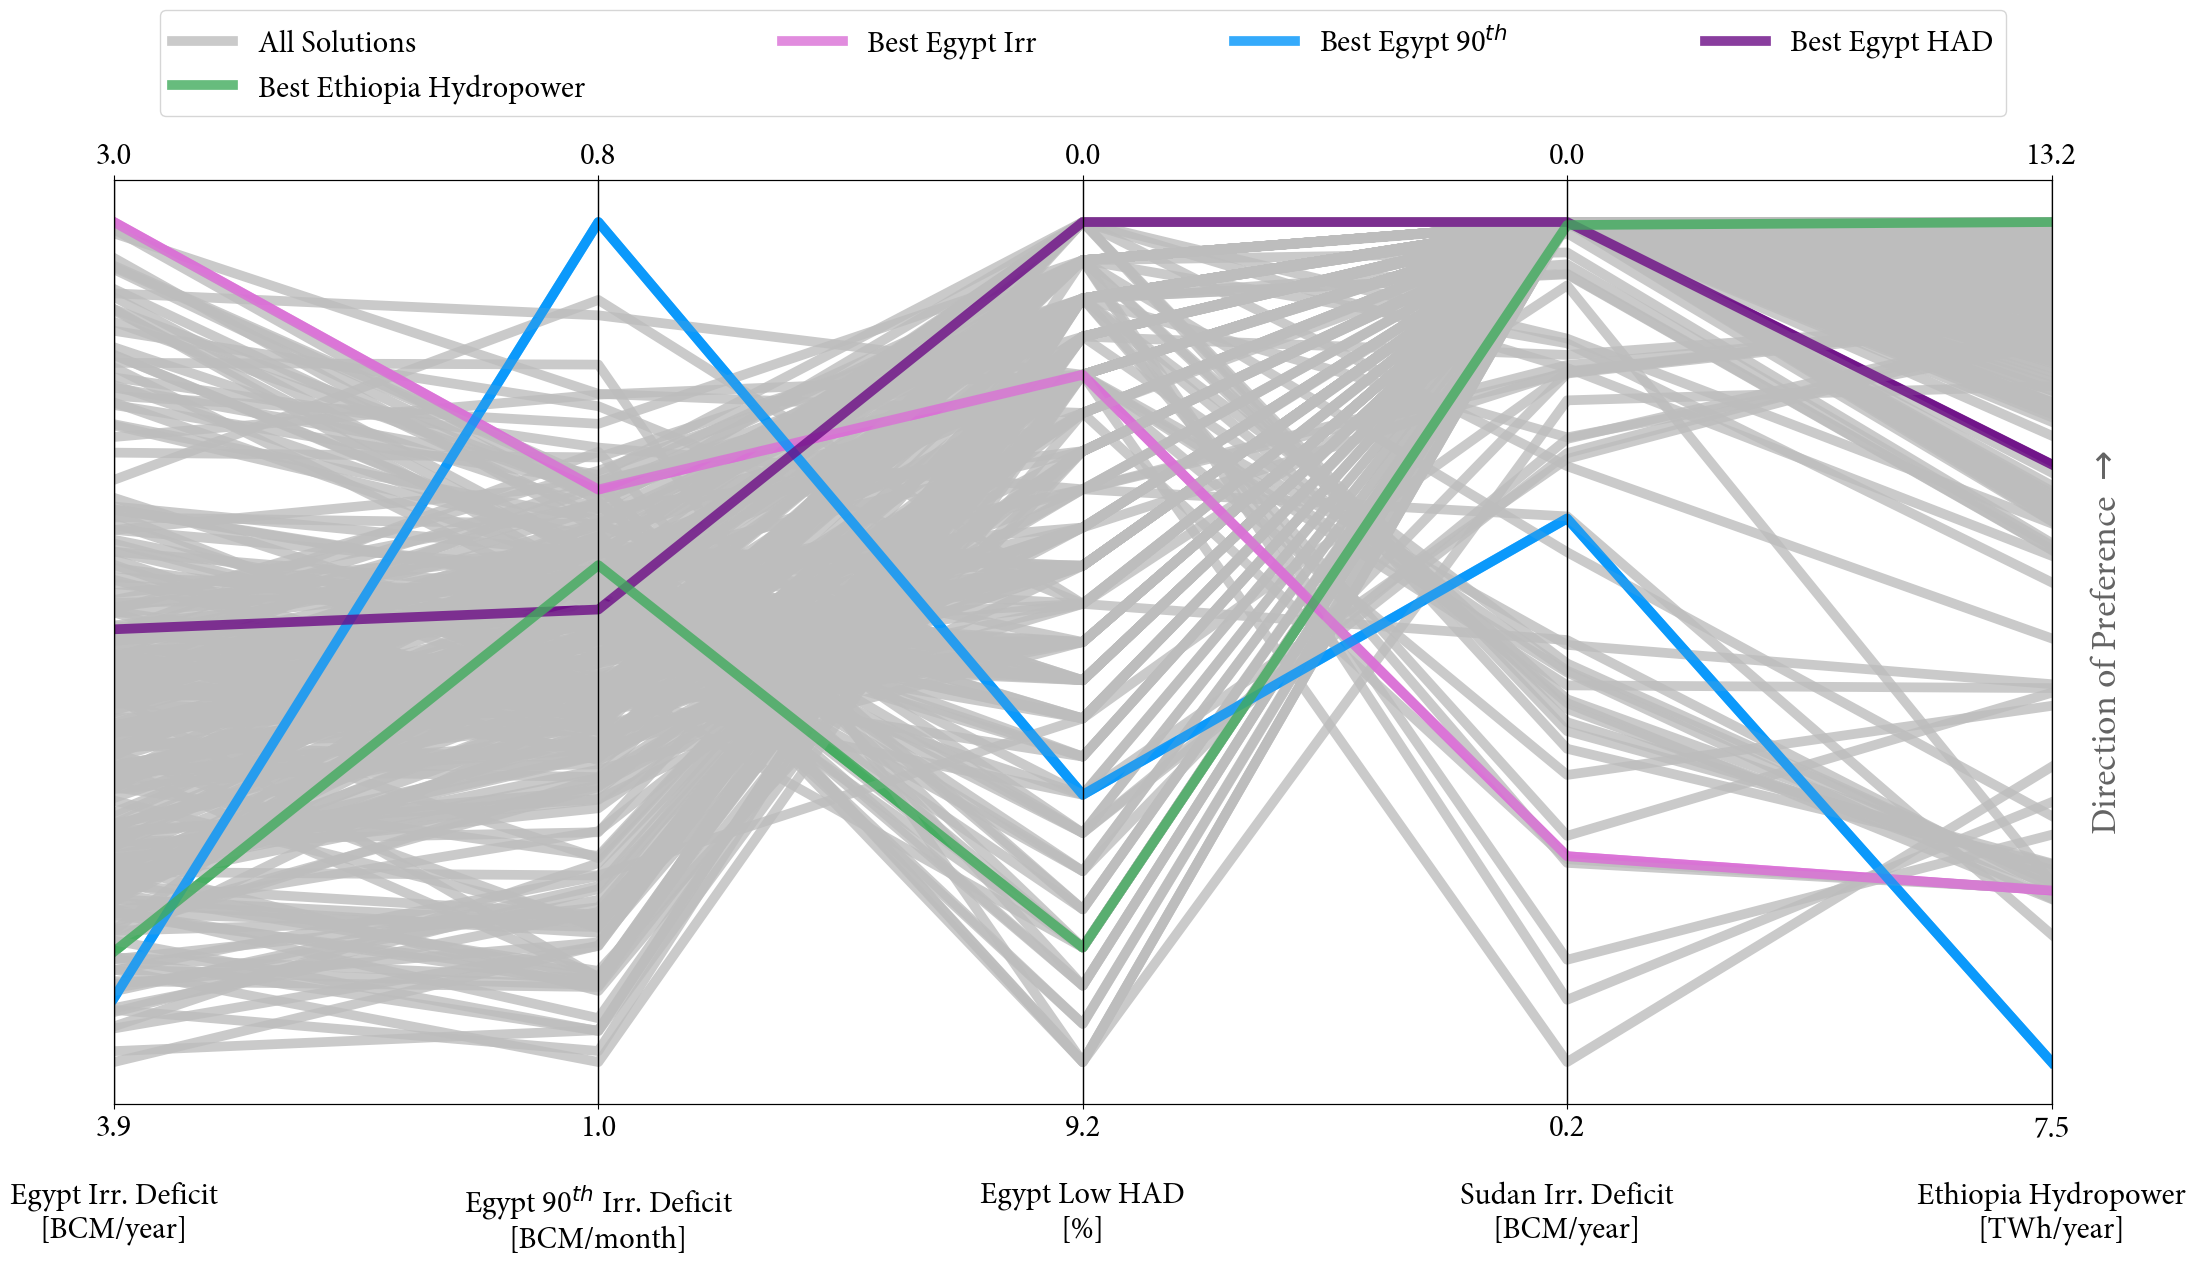

In [13]:
from plotter import parallel_plots_many_policies
parallel_plots_many_policies(objectives, solution_indices = [168, 0, 31, 15],
               solution_names = ["Best Egypt Irr", "Best Egypt 90$^{th}$", "Best Egypt HAD", "Best Ethiopia Hydropower"])

In [14]:
def normalize_objs(df, directions):
    desirability_couples = list()
    working_df = df.copy()
    for i, col in enumerate(df.columns):
        if directions[i] == "min": best, worst = df[col].min(), df[col].max()
        elif directions[i] == "max": best, worst = df[col].max(), df[col].min()
        desirability_couples.append((worst, best))
        working_df[col] = (df[col] - worst) / (best - worst)
        
    return working_df, desirability_couples

Objective values are normalised such that the most desirable value becomes 1 whilst the least desirable becomes 0. On top of the normalised objectives dataframe, we can find some compromise solutions and include them into the color-coded policy set.

In [15]:
norm_df, desire_couples = normalize_objs(
    objectives, ["min", "min", "min", "min", "max"]
)

In [16]:
def find_percentile_compromise_solutions(objectives_norm_df, percentile):
    # Given a threshold percentage and normalised objectives data frame,
    # returns the indices which performs above the threshold percentage
    # for all objectives
    index_lists = []
    for col in objectives_norm_df.columns:
        threshold = np.percentile(objectives_norm_df[col], percentile)
        index_lists.append(objectives_norm_df.loc[objectives_norm_df[col] >= threshold, :].index)
        
    common_indices = []
    for i in objectives_norm_df.index:
        counter = 0
        for check_list in index_lists:
            if i not in check_list: break
            counter += 1
        if counter == len(index_lists):
            common_indices.append(i)
        
    return common_indices
    

In [17]:
def find_threshold_compromise_solutions(objectives_norm_df, threshold):
    # Given a threshold value [0-1] and normalised objectives data frame,
    # returns the indices which performs above the threshold value
    # for all objectives
    index_lists = []
    for col in objectives_norm_df.columns:
        index_lists.append(objectives_norm_df.loc[objectives_norm_df[col] >= threshold, :].index)
        
    common_indices = []
    for i in objectives_norm_df.index:
        counter = 0
        for check_list in index_lists:
            if i not in check_list: break
            counter += 1
        if counter == len(index_lists):
            common_indices.append(i)
        
    return common_indices

In [18]:
find_percentile_compromise_solutions(norm_df, 40)

[84]

In [19]:
find_threshold_compromise_solutions(norm_df, 0.64)

[45]

Now, we can add two more solutions into the policy set for further analysis:

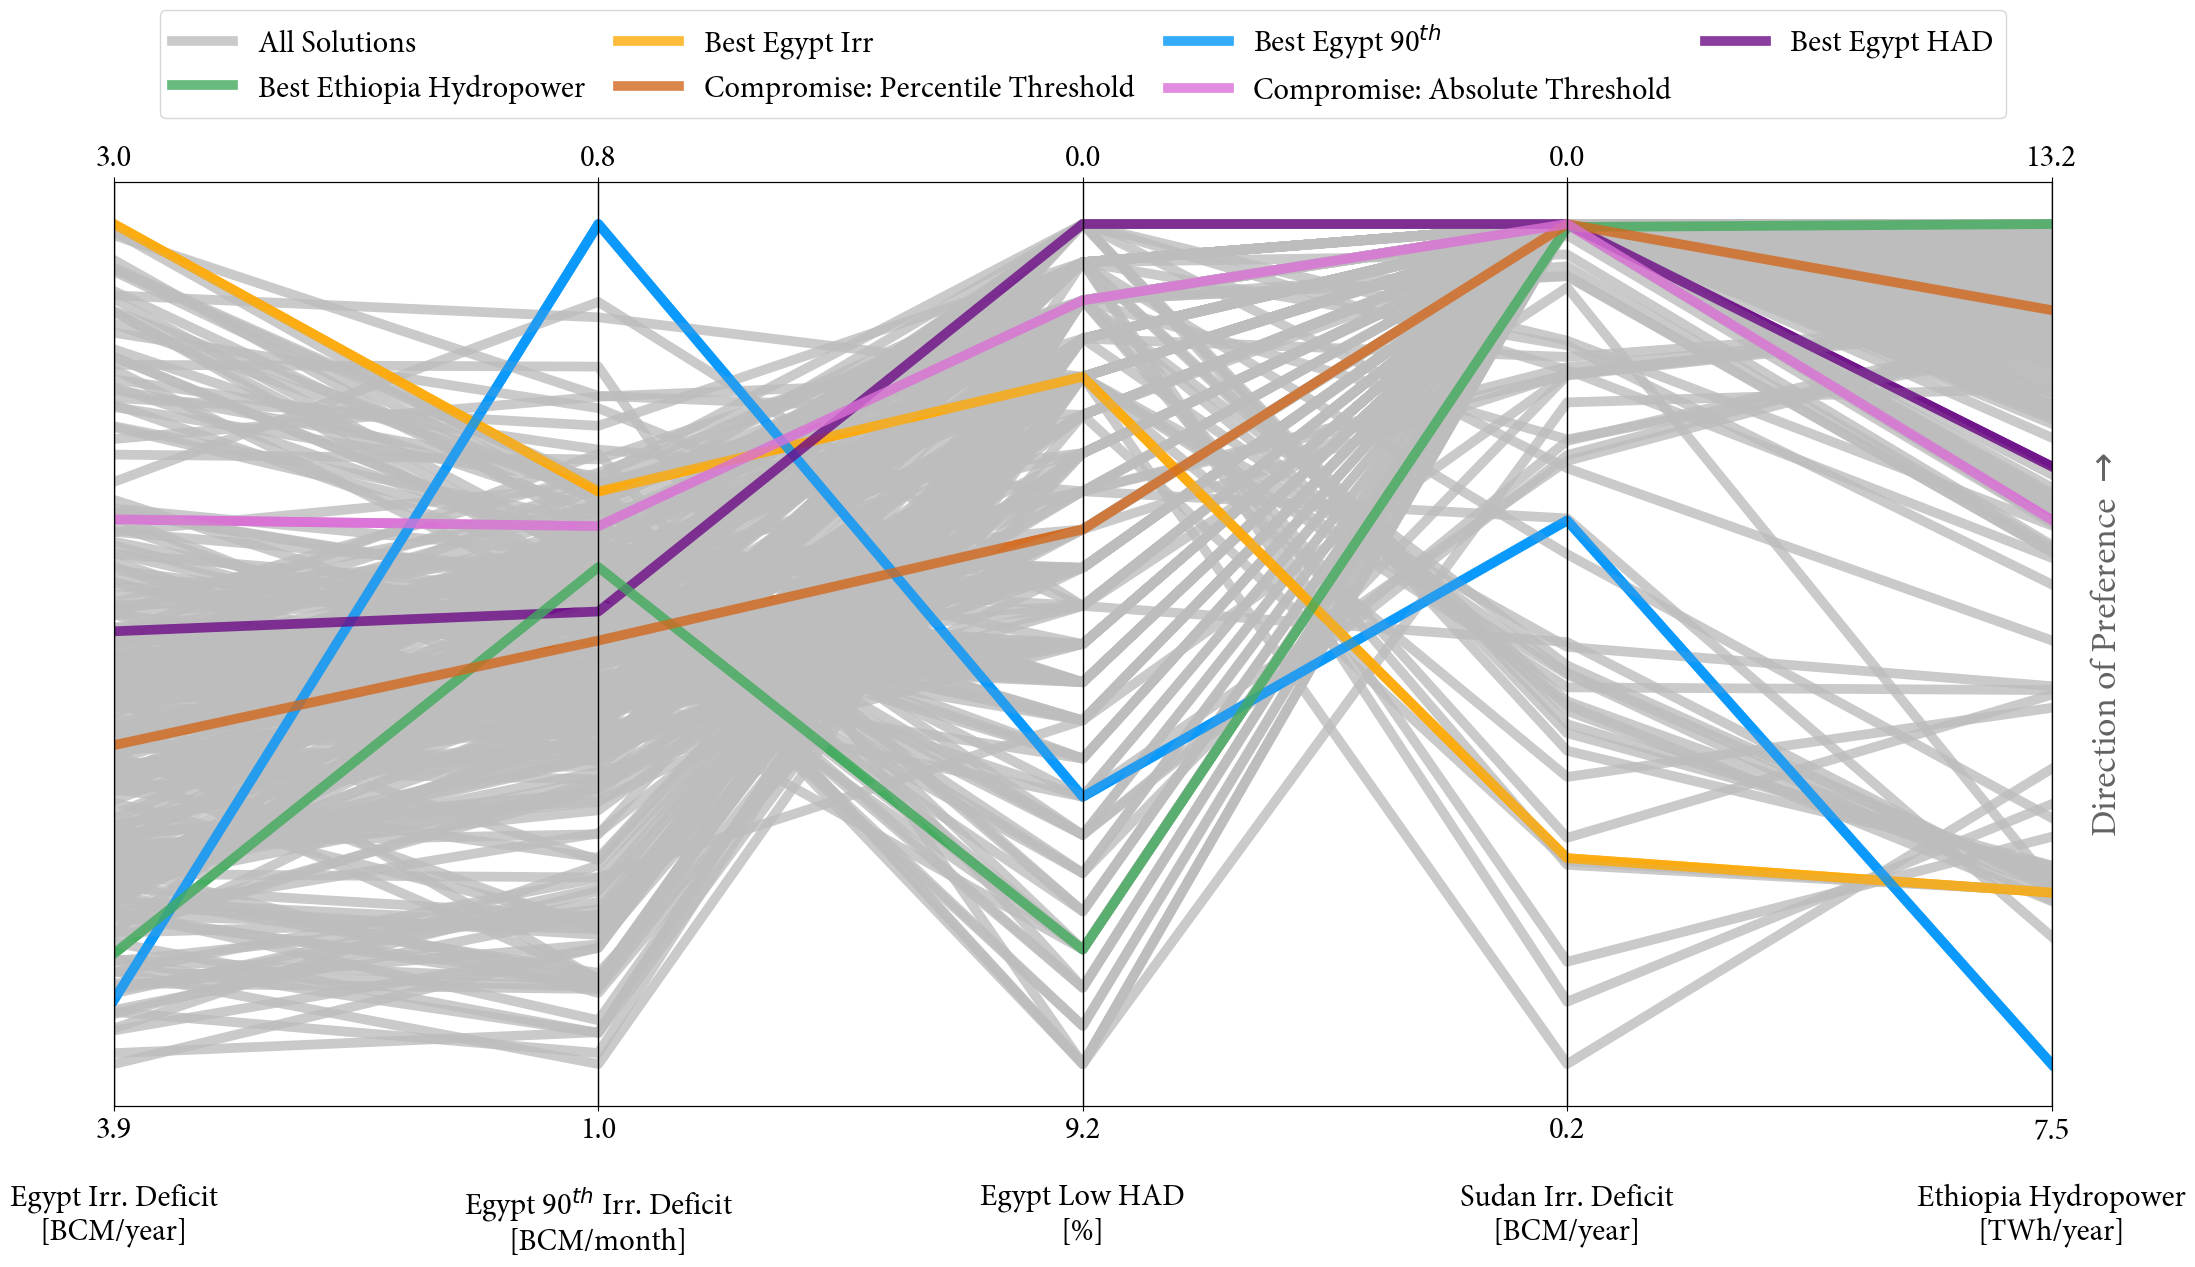

In [20]:
solution_indices = [168, 0, 31, 15, 84, 45]
solution_names = ["Best Egypt Irr", "Best Egypt 90$^{th}$", "Best Egypt HAD", "Best Ethiopia Hydropower",
                  "Compromise: Percentile Threshold", "Compromise: Absolute Threshold"]

parallel_plots_many_policies(objectives, solution_indices=solution_indices,
               solution_names=solution_names, saved=True)

For the following stage of open exploration/scenario discovery, we save the six exemplary policies from above analysis:

In [21]:
policies_for_exploration = policies.loc[[168, 0, 31, 15, 84, 45],:]
policies_for_exploration["name"] = ["best_egypt_aggregate", "best_egypt_90", "best_egypt_HAD", "best_ethiopia",
                                    "compromise_percentile","compromise_threshold"]
policies_for_exploration

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v155,v156,v157,v158,v159,v160,v161,v162,v163,name
168,0.027675,0.431101,0.386805,0.307429,-0.472013,0.489319,0.271693,0.108168,-0.774115,0.971085,...,0.399002,0.559068,0.216790,-0.719823,0.868430,0.950715,0.046718,0.691930,0.988440,best_egypt_aggregate
0,0.905692,0.170598,0.438845,0.307555,-0.777859,0.386203,0.277646,0.108075,-0.922820,0.405889,...,0.415597,0.566493,0.314284,-0.719244,0.871550,0.081926,0.044716,0.661717,0.997476,best_egypt_90
31,0.042187,0.445677,0.438277,0.304983,-0.783147,0.491964,0.263191,0.103177,-0.749246,0.406421,...,0.414964,0.562632,0.211209,-0.718837,0.871991,0.953052,0.055762,0.690708,0.992917,best_egypt_HAD
15,0.014670,0.422703,0.386431,0.309080,-0.237964,0.309759,0.265029,0.108896,-0.971549,0.403978,...,0.406833,0.563267,0.237695,-0.719076,0.871977,0.101661,0.045688,0.698620,0.984728,best_ethiopia
84,0.039504,0.479213,0.437965,0.307204,-0.794300,0.510652,0.243035,0.045077,-0.747050,0.402449,...,0.406913,0.569532,0.218934,-0.729808,0.899555,0.085155,0.054110,0.697230,0.980149,compromise_percentile
45,0.042220,0.469741,0.426929,0.305591,-0.778528,0.734479,0.263455,0.113560,-0.793778,0.411874,...,0.406493,0.560469,0.238765,-0.718833,0.873723,0.933073,0.055896,0.709431,0.997992,compromise_threshold


In [22]:
policies_for_exploration.to_csv("../outputs/policies_exploration.csv", index=False)

## Pair plot of Objective Values

Now, let's show the pairplot of all objectives across the set of solutions found by the optimisation:

In [22]:
names_display = ['Egypt Irr. Deficit','Egypt 90$^{th}$ Irr. Deficit','Egypt Low HAD','Ethiopia Hydropower']
norm_df_names = norm_df.copy()
norm_df_names.columns = names_display
sns.pairplot(norm_df_names, corner=True, diag_kind="kde", kind="reg", plot_kws={'line_kws':{'color':'red'}})


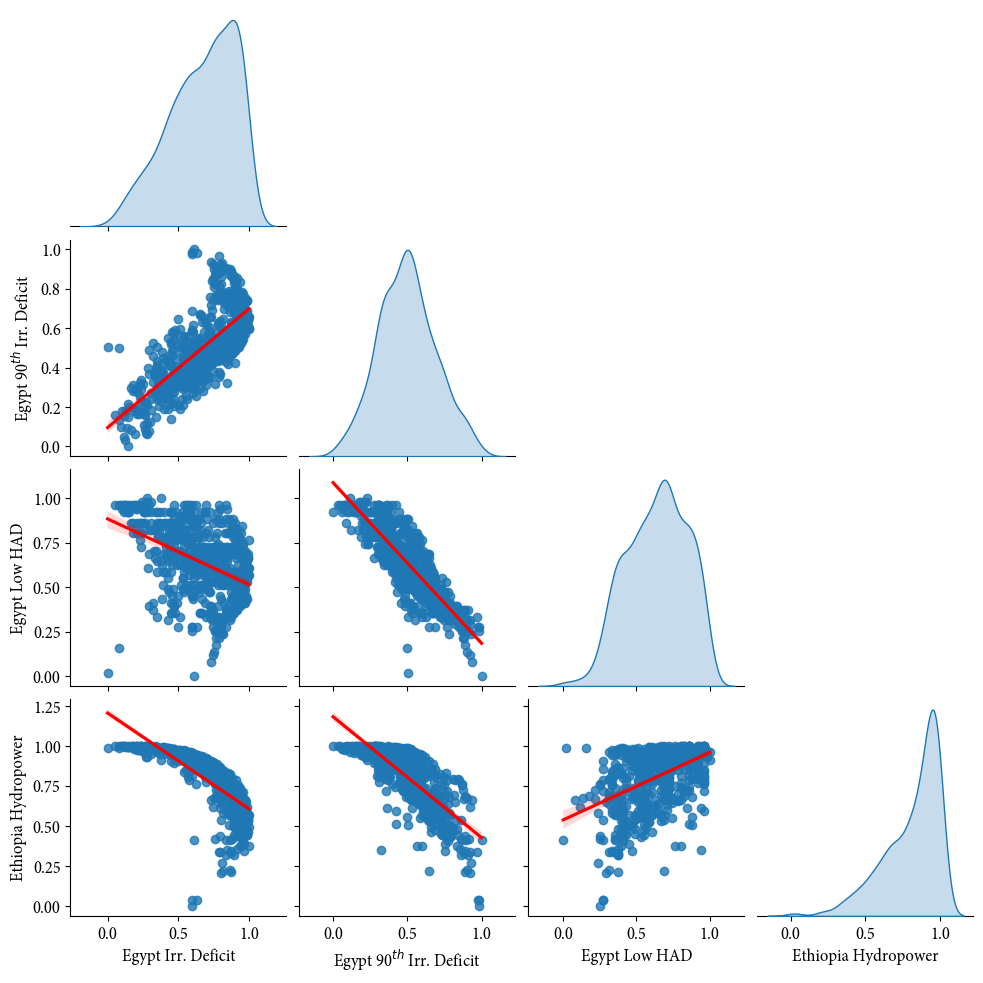

In [23]:
plt.show()

## System Behaviour under Selected Policies

In [24]:
solution_indices = [589,464, 135, 531, 22, 90]
solutions = [policies.loc[i] for i in solution_indices]
solution_names = ["Best Egypt Irr", "Best Egypt 90$^{th}$", "Best Egypt HAD", "Best Ethiopia Hydropower",
                  "Compromise: Percentile Threshold", "Compromise: Absolute Threshold"]

In [25]:
nile_model = ModelNile()
nile_model = generate_input_data(nile_model, sim_horizon=20)
#nile_model.evaluate(solutions[3])

In [27]:
(nile_model.irr_districts["Egypt"].demand)

array([1475.81768657, 1824.80021598, 1841.61865101, 1790.04211722,
       2135.94126686, 2745.88984951, 2842.31554488, 2480.71918779,
       1803.0764044 , 1635.59282105, 1668.38876874, 1526.27299166,
       1505.3340403 , 1861.2962203 , 1878.45102403, 1825.84295957,
       2178.66009219, 2800.8076465 , 2899.16185578, 2530.33357155,
       1839.13793249, 1668.30467747, 1701.75654411, 1556.7984515 ,
       1535.44072111, 1898.52214471, 1916.02004451, 1862.35981876,
       2222.23329404, 2856.82379943, 2957.1450929 , 2580.94024298,
       1875.92069113, 1701.67077102, 1735.79167499, 1587.93442053,
       1566.14953553, 1936.4925876 , 1954.3404454 , 1899.60701513,
       2266.67795992, 2913.96027542, 3016.28799476, 2632.55904784,
       1913.43910496, 1735.70418644, 1770.50750849, 1619.69310894,
       1597.47252624, 1975.22243935, 1993.42725431, 1937.59915543,
       2312.01151912, 2972.23948093, 3076.61375465, 2685.2102288 ,
       1951.70788706, 1770.41827017, 1805.91765866, 1652.08697

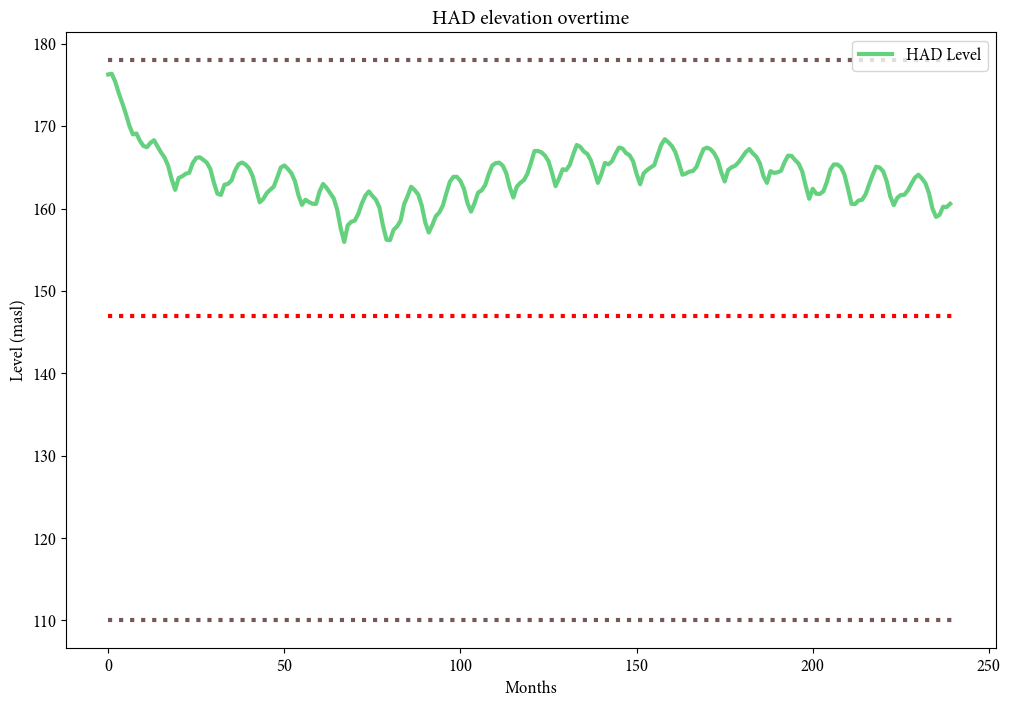

In [27]:
plotter = HydroModelPlotter(nile_model)
plotter.plot_level_with_limits("HAD")

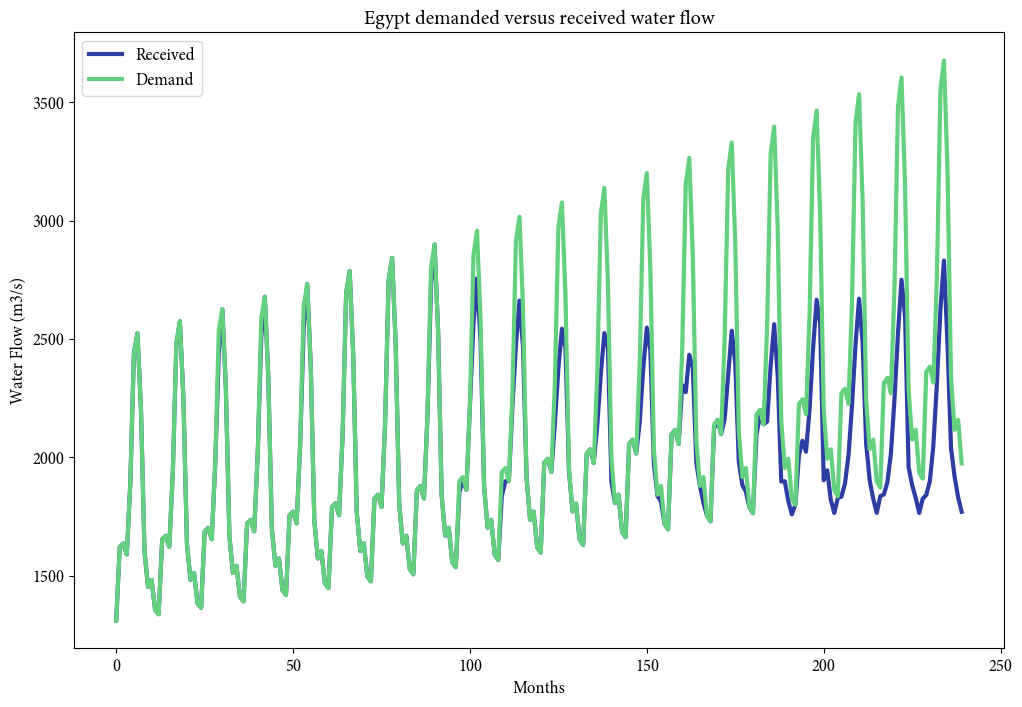

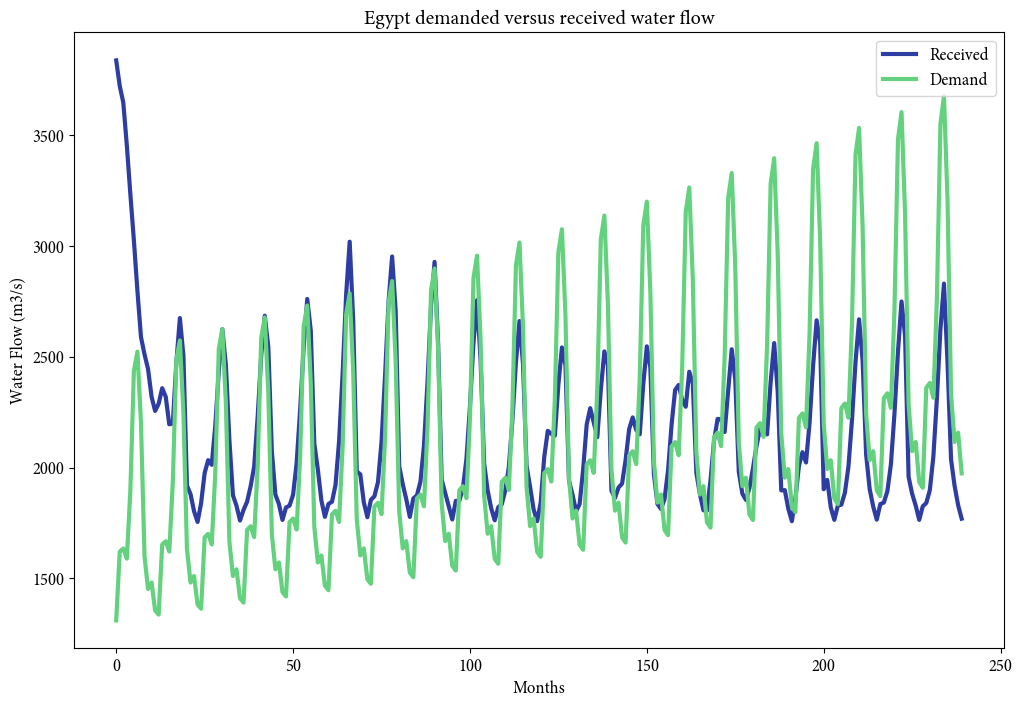

In [28]:
plotter.plot_received_vs_demand_for_district("Egypt")
plotter.plot_received_vs_demand_for_district_raw("Egypt")

In [26]:
totsum = 0
for catch in nile_model.catchments.values():
    totsum += np.sum(catch.inflow*30*24*3600*1e-9/20)
    
print(totsum)

93.00868797637382


In [28]:
totsum = 0
for irr in nile_model.irr_districts.values():
    totsum += np.sum(irr.demand*30*24*3600*1e-9/20)
    
print(totsum)

81.29937723982894


In [30]:
# bcm_def_egypt = [month * 3600 * 24 * nile_model.nu_of_days_per_month[i % 12] * 1e-9
#                          for i, month in enumerate(nile_model.irr_districts["Egypt"].deficit)]

In [36]:
# np.percentile(
#             bcm_def_egypt, 90, interpolation="closest_observation"
#         )

<ipython-input-36-12c632122693>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  np.percentile(


0.45713312984397964

In [40]:
print((nile_model.irr_districts["Egypt"].demand*3600*24*30*1e-9)[-12:].sum())
print((nile_model.irr_districts["Egypt"].deficit*3600*24*30*1e-9)[-12:].sum())
print((nile_model.irr_districts["Egypt"].received_flow*3600*24*30*1e-9)[-12:].sum())

79.70307912249487
12.427218248409224
67.27586087408565


In [41]:
print((nile_model.irr_districts["Egypt"].demand*3600*24*30*1e-9).sum())
print((nile_model.irr_districts["Egypt"].deficit*3600*24*30*1e-9).sum())
print((nile_model.irr_districts["Egypt"].received_flow*3600*24*30*1e-9).sum())

1329.3247773432372
42.39824212375971
1286.9265352194775


In [46]:
16357.346498364082*3600*24*365*1e-9/12

42.98710659770081

In [48]:
m3s_to_bcm_per_year(16357.346498364082)*20/12

42.98710659770081

-------------------------------------------------
Best Egypt Irr (16357.346498364082, 179.34176453279247, 0.10833333333333334, 709.6833752370225, 0.0, 7.945437970150134)


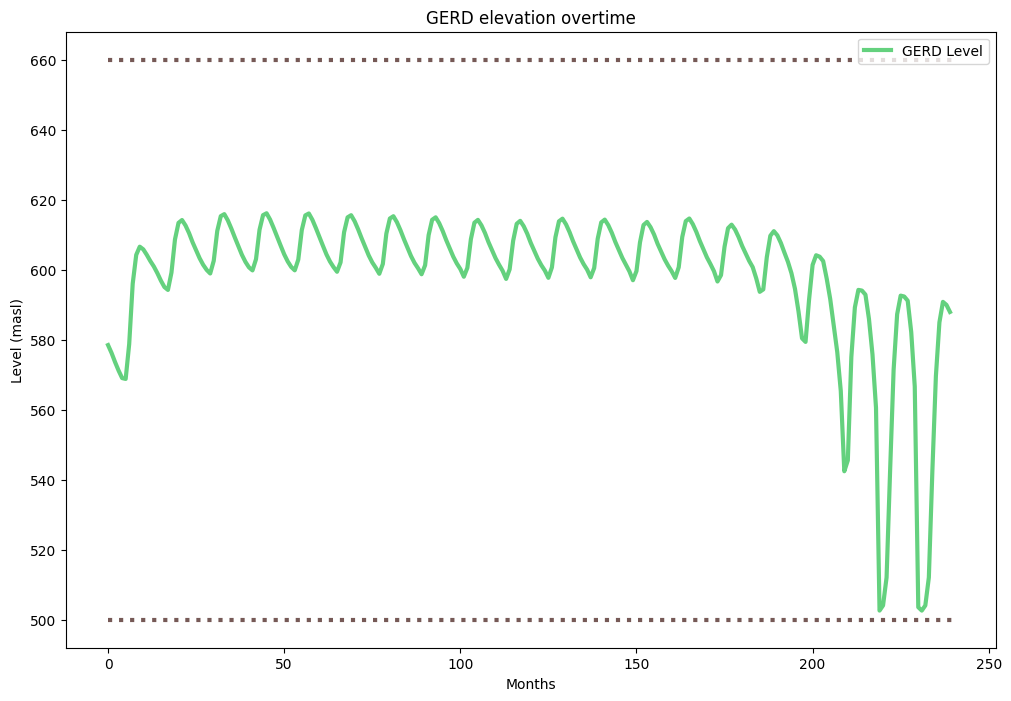

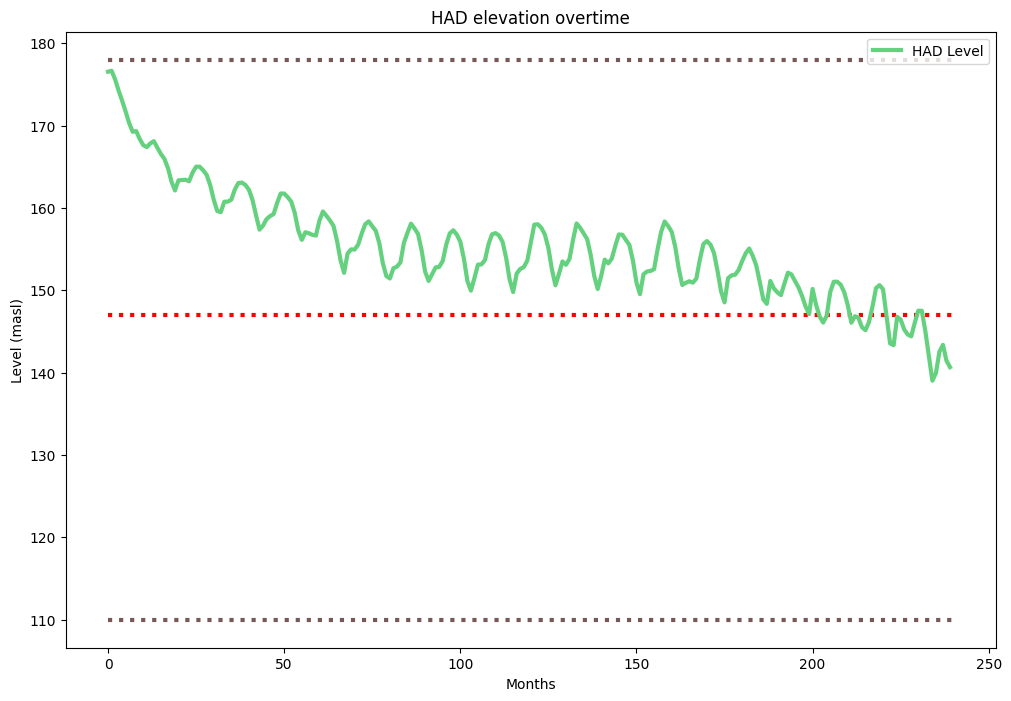

-------------------------------------------------
Best Egypt $90^{th}$ (22525.24227941626, 65.76521899050294, 0.17916666666666667, 49.463894089789875, 0.0, 7.046422415590297)


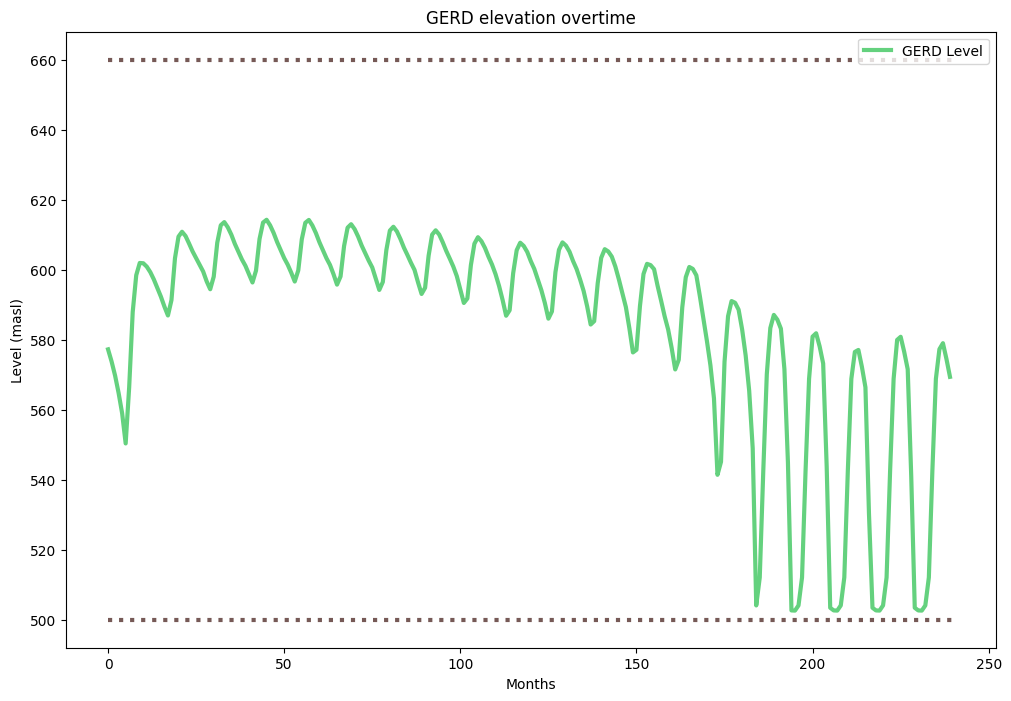

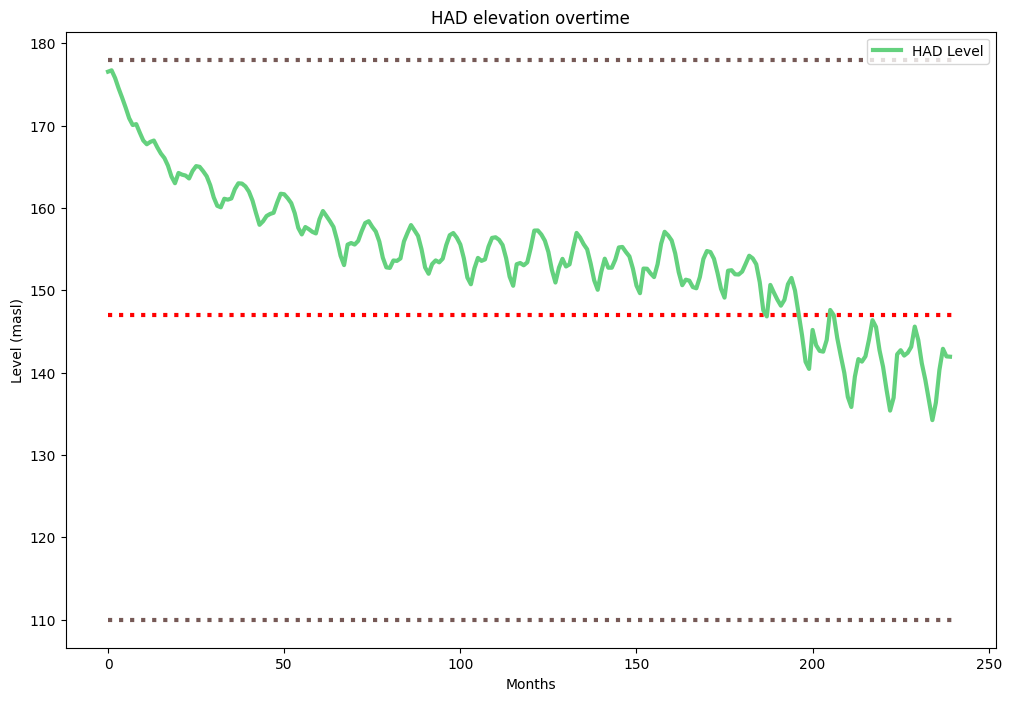

-------------------------------------------------
Best Egypt HAD & Sudan (31885.155606737157, 349.74179960052675, 0.0, 0.0, 0.0, 8.506525032935288)


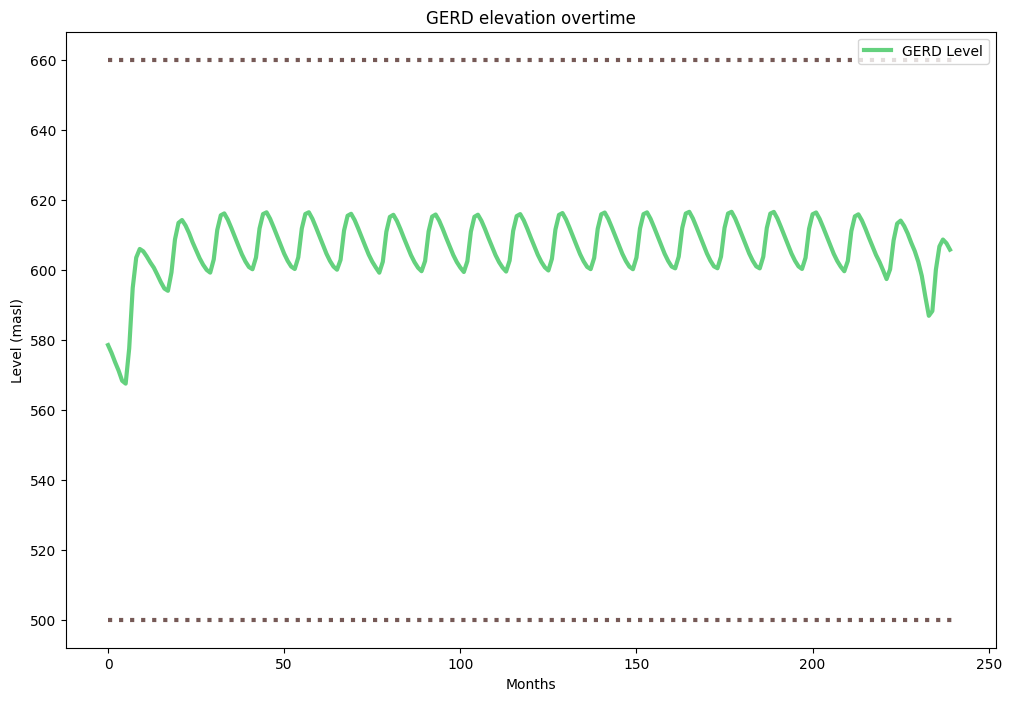

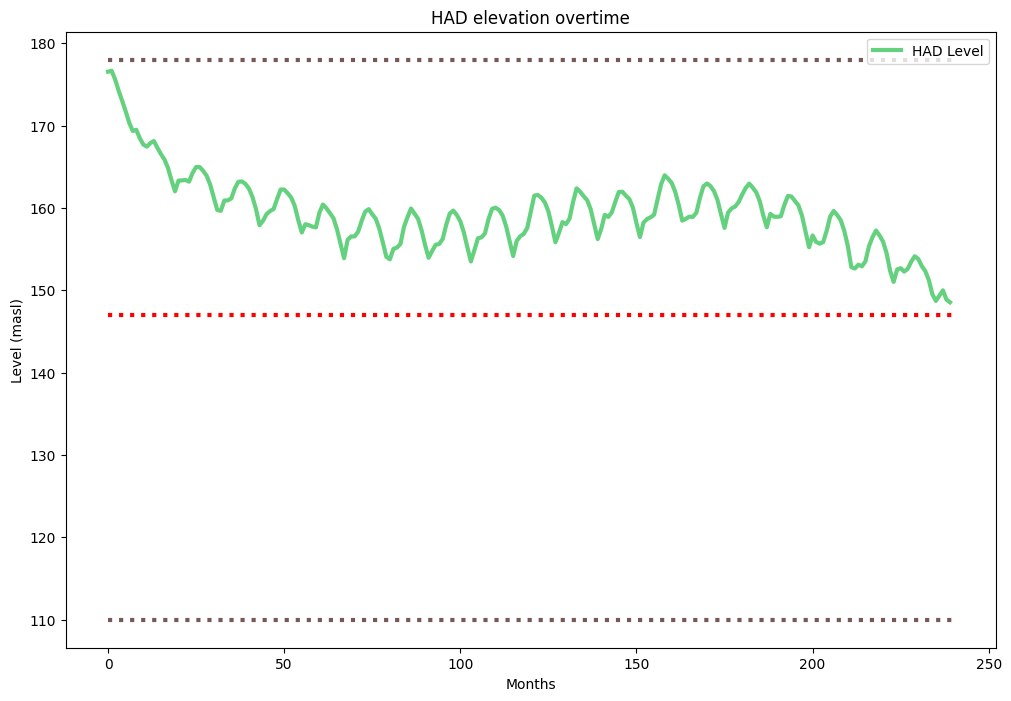

-------------------------------------------------
Best Ethiopia Hydropower (25930.909735998197, 363.1718957818198, 0.029166666666666667, 0.0, 0.0, 8.564239529224617)


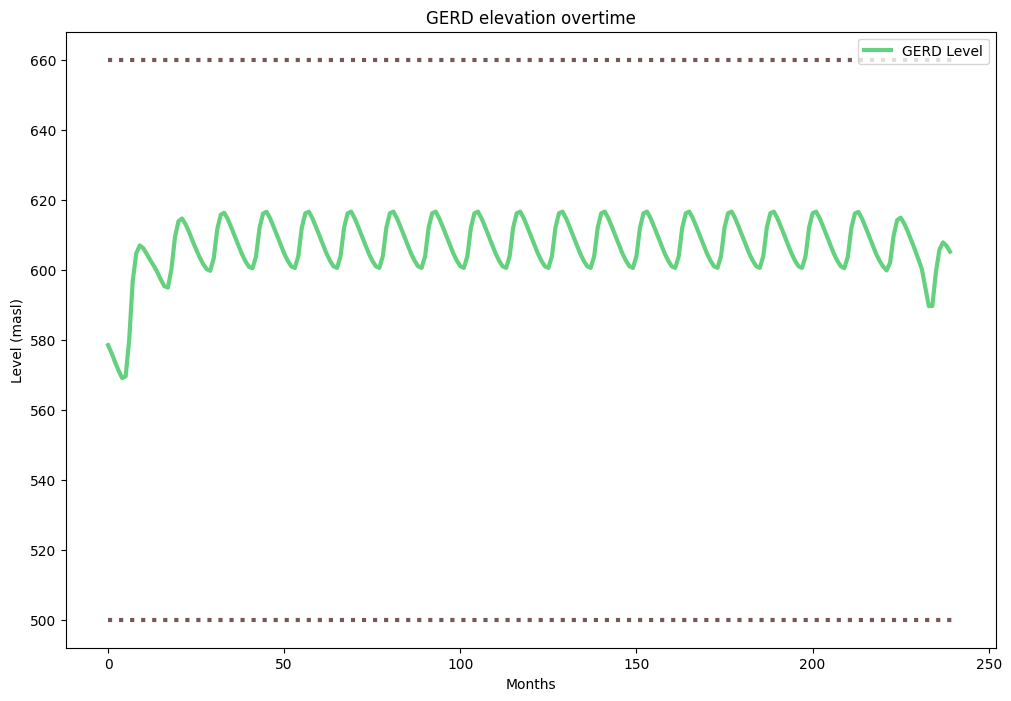

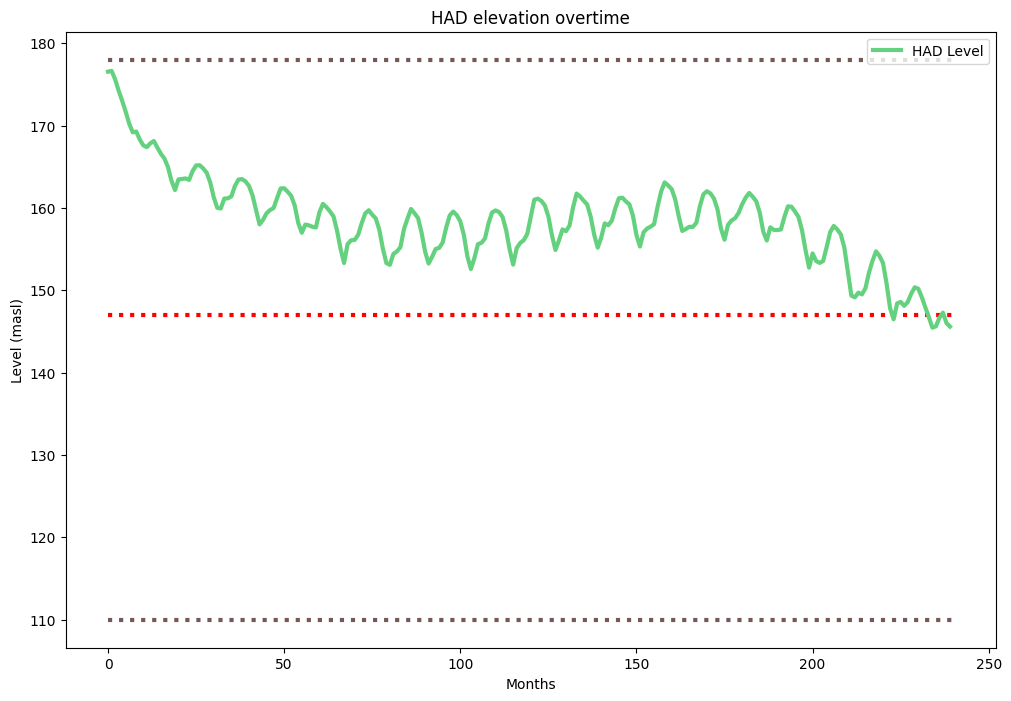

-------------------------------------------------
Compromise: Percentile Threshold (20062.815815901147, 265.69489305436264, 0.0625, 76.40979640110987, 0.0, 8.383083636904255)


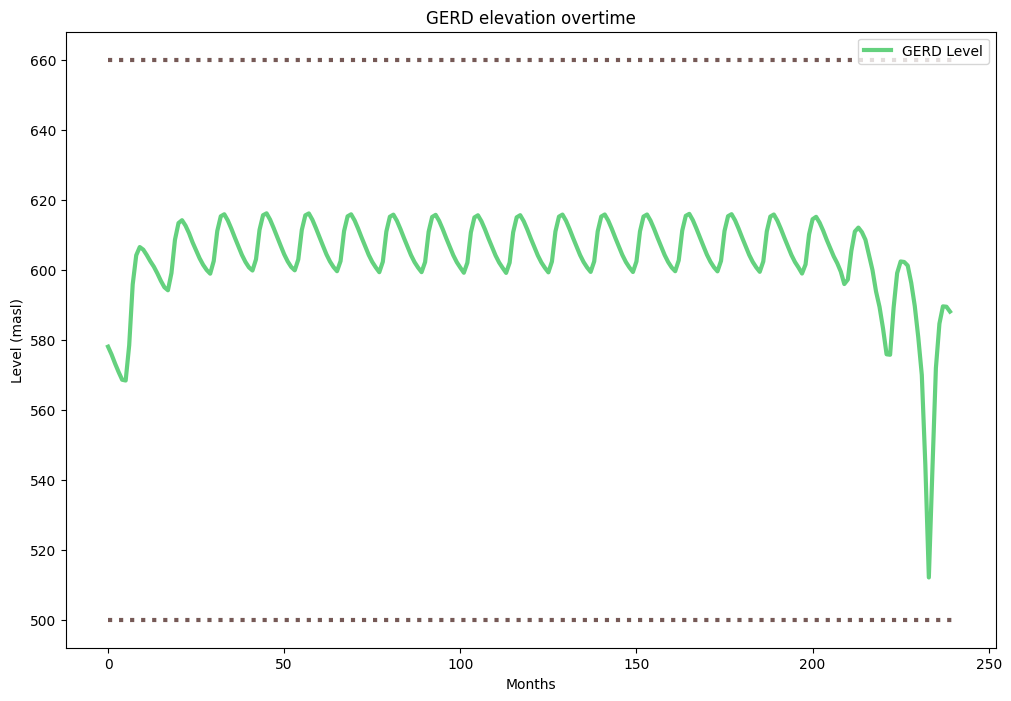

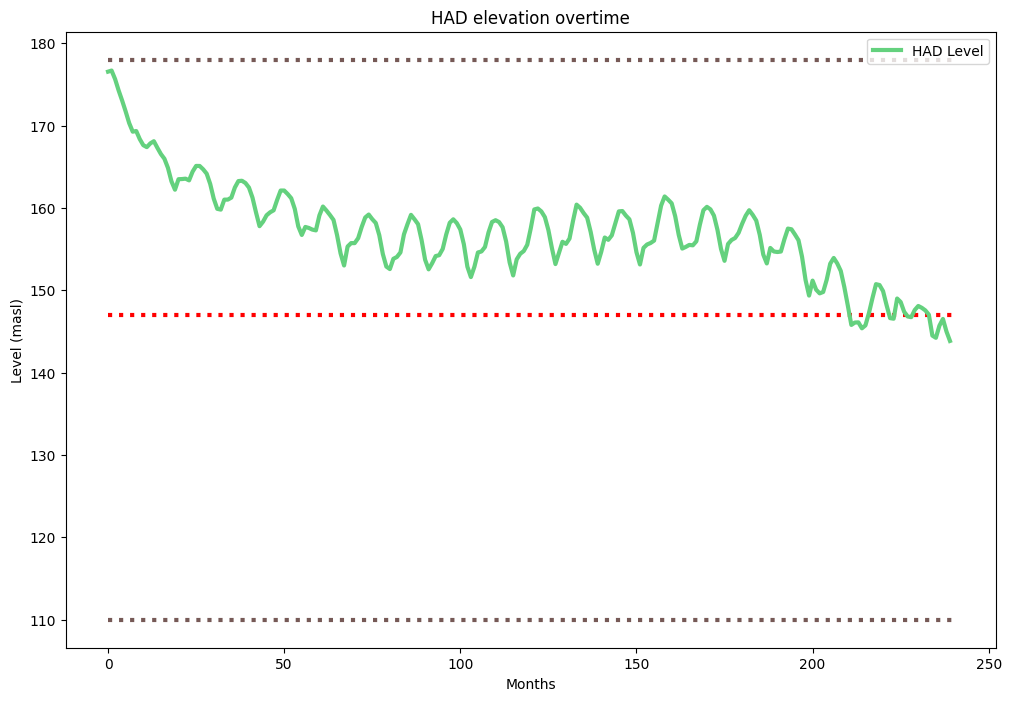

-------------------------------------------------
Compromise: Absolute Threshold (17837.36715104791, 196.30126238234607, 0.08333333333333333, 555.1402082345224, 0.0, 8.243687993043359)


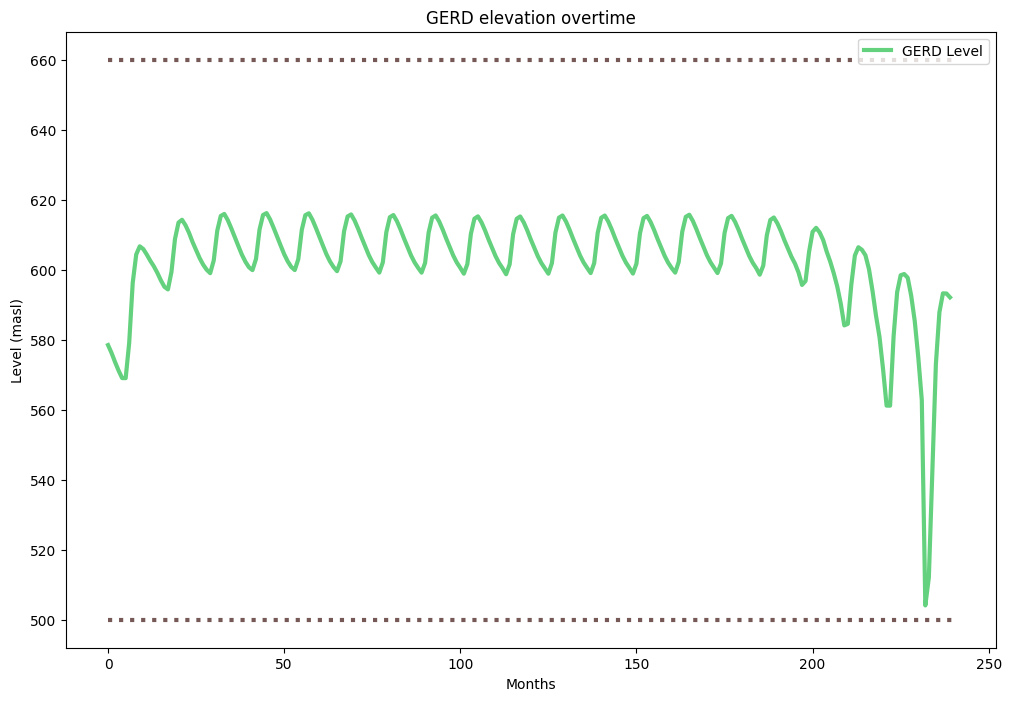

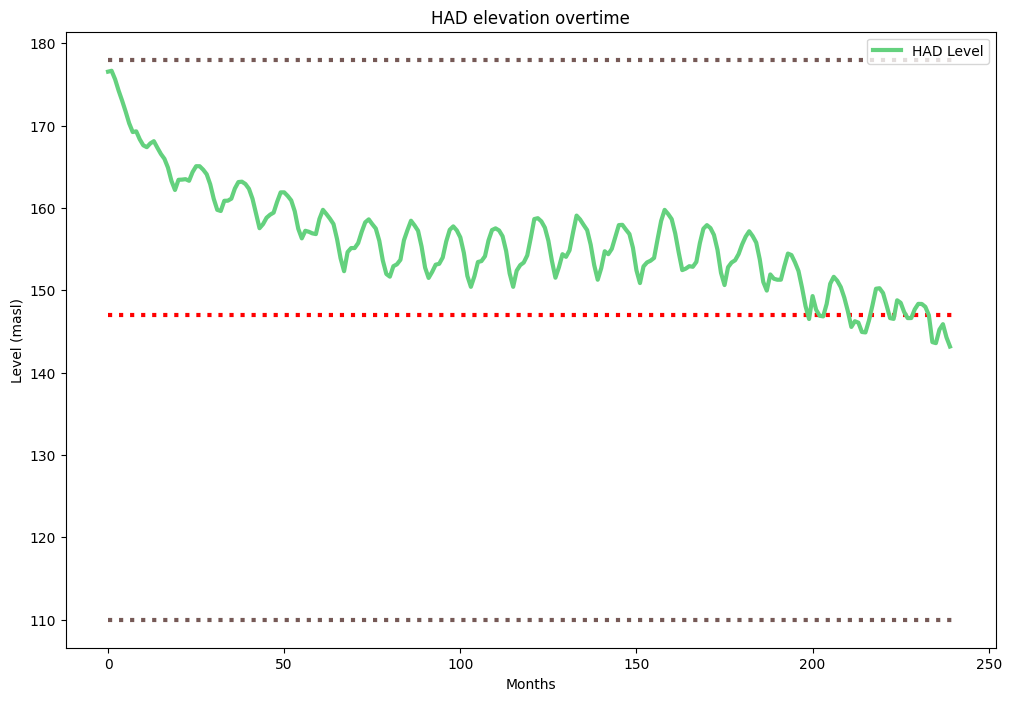

In [27]:
#release_list = []

for i, policy in enumerate(solutions):
    nile_model = ModelNile()
    nile_model = generate_input_data(nile_model, sim_horizon=20)
    
    print("-------------------------------------------------")
    print(solution_names[i], nile_model.evaluate(policy))
    
    plotter = HydroModelPlotter(nile_model)
    
    # ax_inflow_vs_released = plotter.plot_inflow("GERD")
    # ax_inflow_vs_released = plotter.plot_release("GERD", label=policy_names[i], ax=ax_inflow_vs_released)
    
    #release_list.append(nile_model.reservoirs["GERD"].release_vector)
    
    
    
#     for reservoir in nile_model.reservoirs.keys():
#         #plotter.plot_condensed_inflow_separated(reservoir, policy_names[i])
#         #plotter.plot_condensed_release_separated(reservoir, policy_names[i])
#         #plotter.plot_condensed_level_separated(reservoir, policy_names[i])
        
#         plotter.plot_condensed_release_versus_inflow(reservoir, solution_names[i])
#         plotter.plot_condensed_inflow(reservoir, solution_names[i])
#         plotter.plot_condensed_release(reservoir, solution_names[i])
#         plotter.plot_condensed_level(reservoir, solution_names[i])
        
    plotter.plot_level_with_limits("GERD")
    plotter.plot_level_with_limits("HAD")
        
#     for district in ["Egypt"]: #nile_model.irr_districts.keys():
#         plotter.plot_received_vs_demand_for_district(district)
#         plotter.plot_received_vs_demand_for_district_raw(district)
        
    
    

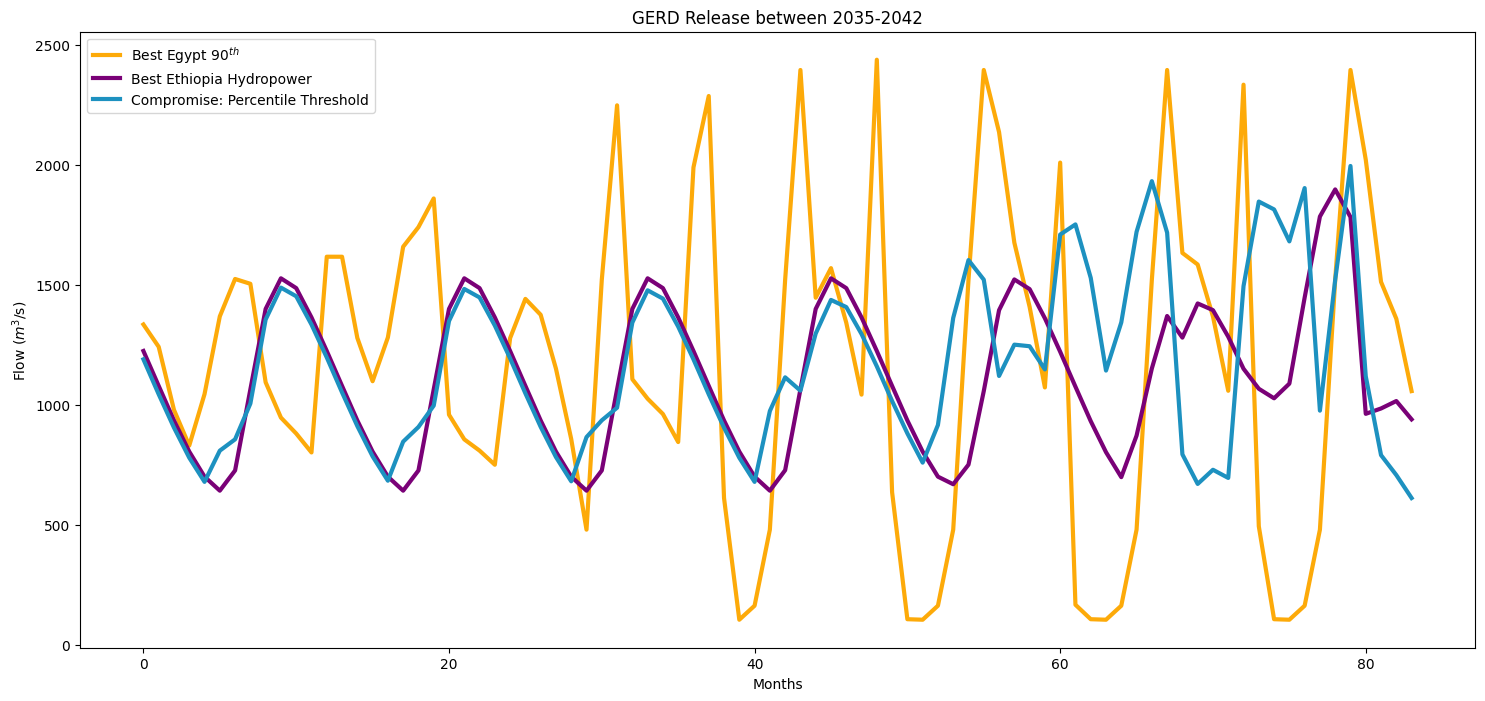

In [41]:
gray='#bdbdbd'
purple='#7a0177'
green='#41ab5d'
blue='#1d91c0'
yellow='#fdaa09'
pink='#c51b7d'

release_60 = [release_list[i][-84:] for i in range(len(release_list)) if i in [1,3,4]]

plotter.plot_multiple_lines_together(release_60, 
                                     ["Best Egypt $90^{th}$",
                                      "Best Ethiopia Hydropower",
                                      "Compromise: Percentile Threshold"],
                                     title="GERD Release between 2035-2042",
                                     x_title="Months",
                                     y_title="Flow ($m^{3}$/s)",
                                     colors=[yellow, purple, blue]
                                    )

In [17]:
# test_policies = [best_egypt_irr_and_HAD, best_egypt_90, best_ethiopia_hydro]
# nile_model = generate_input_data(nile_model, sim_horizon=20)
# model_plotter = HydroModelPlotter(nile_model)

# for pol in test_policies:
#     nile_model.evaluate(pol)
#     model_plotter.plot_received_vs_demand_for_district("Egypt")
#     model_plotter.plot_received_vs_demand_for_district("Gezira")
    
#     for dam in nile_model.reservoir_names:
#         model_plotter.plot_level_with_limits(dam)
#         model_plotter.plot_levels_condensed(dam)
    

In [82]:
def parallel_plots(objectives_df, solution_indices = [], solution_names = []):
    file_name='Best_objectives'

    names= list(objectives_df.columns)
    
    names_display = ['Egypt_irr','Egypt90_irr','Egypt_low_HAD','Sudan_irr','Ethiopia_hydro']
    units=['BCM/year','m3/s','%','BCM/year','TWh/year']
    directions=["min", "min", "min", "min", "max"]
    
    norm_df, desirability_couples = normalize_objs(objectives_df, directions)
    
    uds=[] #undesired
    ds=[] #desired
    for i in desirability_couples:
        uds.append(str(round(i[0], 1)))
        ds.append(str(round(i[1], 1)))
    
    norm_df['Name'] = "All Solutions"
    for i, solution_index in enumerate(solution_indices):
        norm_df.loc[solution_index, "Name"] = solution_names[i]
        norm_df = norm_df.append(norm_df.loc[solution_index,:].copy())
    
    fig = plt.figure()

    ax1 = fig.add_subplot(111)

    gray='#bdbdbd'
    purple='#7a0177'
    green='#41ab5d'
    blue='#1d91c0'
    yellow='#fdaa09'
    pink='#c51b7d'

    parallel_coordinates(norm_df,'Name', color= [gray,purple,yellow,blue,pink,green,"red"], linewidth=7, alpha=.8)
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=4, mode="expand", borderaxespad=1.5, fontsize=18)
    
    ax1.set_xticks(np.arange(len(names)))
    
    ax1.set_xticklabels([uds[i]+'\n'+'\n'+names[i]+'\n'+units[i] for i in range(len(names))],
                        fontsize=18)
    ax2 = ax1.twiny()
    ax2.set_xticks(np.arange(len(names)))
    ax2.set_xticklabels([ds[i] for i in range(len(names))], 
                        fontsize=18)
    
    ax1.get_yaxis().set_visible([])
    plt.text(1.02, 0.5, 'Direction of Preference $\\rightarrow$', {'color': '#636363', 'fontsize': 20},
             horizontalalignment='left',
             verticalalignment='center',
             rotation=90,
             clip_on=False,
             transform=plt.gca().transAxes)

    fig.set_size_inches(17.5, 9)
    plt.show()

In [83]:
objectives

,egypt_irr,egypt_90,egypt_low_had,sudan_irr,ethiopia_hydro
0,30756.347466,405.222143,0.008333,0.000000,3.251154e+07
1,21022.203556,277.429739,0.016667,1470.246617,5.995508e+06
2,25122.257813,286.975361,0.104167,0.000000,3.220148e+07
3,23272.987115,236.067736,0.150000,68.840364,3.138020e+07
4,26440.156002,310.429921,0.079167,0.000000,3.251154e+07
...,...,...,...,...,...
845,18506.815675,144.778832,0.129167,77.186038,2.346972e+07
846,18382.679249,218.740521,0.100000,127.865400,2.718407e+07
847,26817.784397,358.505919,0.016667,0.000000,3.130520e+07
848,21964.758312,317.305943,0.016667,314.168930,2.912748e+07
